<img src="https://upload.wikimedia.org/wikipedia/fr/8/81/Sciences_SU.png" width="600" height="240" align="center"/>

# <!-- TITLE --> Rendu 


### Objectives :

Avoir un aperçu des données utilisées pour l'entrainement du modéle et de voir quelques résultats d'entrainement et de test.  


### Etudiants :

- Nom : SAKR                                                         
- Prénom : Mohamed Walid    



- Nom : NABTI        
- Prenom : Anes  

- Nom : FEZAI       
- Prenom : Yousri

- Nom : BOUIN       
- Prenom : Salomé



## 1. Importation des bibliothéques

In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.insert(1, './src')
import os
import matplotlib.image as mpimg
from PIL import Image
import matplotlib.pyplot as plt
from utils.plots import plot_images
from train import Train
from evaluation import Evaluation


## Have a Look

Load attributs

In [2]:
dataset_desc = pd.read_csv('./data/list_attr_celeba.csv')
dataset_desc.head(5)

,file_name,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,0,1,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
1,000002.jpg,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,000003.jpg,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,000004.jpg,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
4,000005.jpg,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [3]:
print(f'\nDonnées manquantes : {dataset_desc.isna().sum().sum()}')
print(f'dataset attributes shape : {dataset_desc.shape}')


Données manquantes : 0
dataset attributes shape : (202597, 41)


Load images ( a changer avec la fonction de Anes)

In [4]:
read_img=[]
PATH = os.getcwd()
for i in range (1, 12) :
    if i % 10000 == 0:
        print('iteration :',i)
    read_img.append(mpimg.imread(PATH + "\\data\\img_align_celeba\\%06i.jpg" % i)[20:-20]) 

In [5]:
import random
#samples = [ random.randint(0,len(read_img)-1) for i in range(11)]
samples = [i for i in range(len(read_img))]
print("Samples of our loaded images : ",samples)

Samples of our loaded images :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [6]:
y = list(dataset_desc["Smiling"][samples])
print("Attribut smiling values for loaded images : " ,y)

Attribut smiling values for loaded images :  [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1]


Plots images

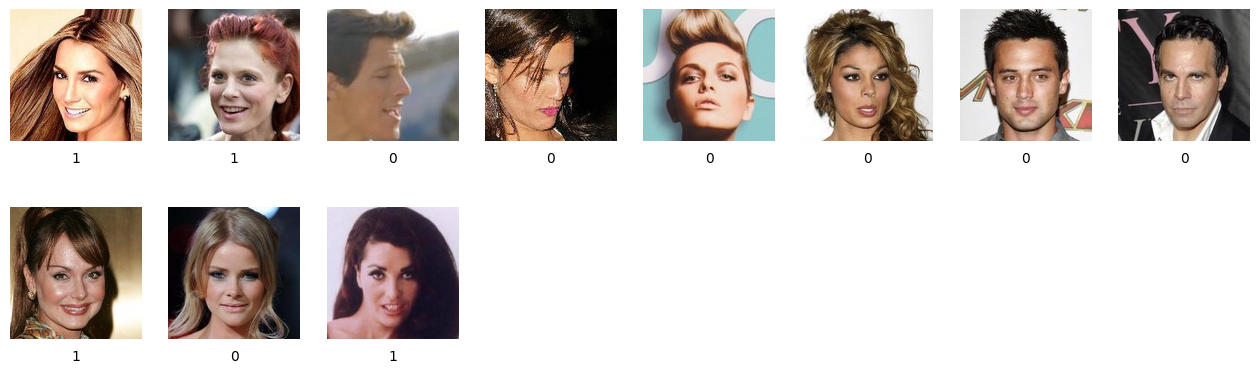

In [7]:
plot_images(read_img, y = y, indices=samples, columns=8, x_size=2, y_size=2)

### - Few statistics
We want to know if our images are homogeneous in terms of size, ratio, width or height.

In [8]:
data_size  = []
data_ratio = []
data_lx    = []
data_ly    = []

for image in read_img:
    (lx,ly,lz) = image.shape
    data_size.append(lx*ly/1024)
    data_ratio.append(lx/ly)
    data_lx.append(lx)
    data_ly.append(ly)

df=pd.DataFrame({'Size':data_size, 'Ratio':data_ratio, 'Lx':data_lx, 'Ly':data_ly})
display(df.describe().style.format("{0:.2f}").set_caption("About our images :"))

,Size,Ratio,Lx,Ly
count,11.00,11.00,11.00,11.00
mean,30.94,1.00,178.00,178.00
std,0.00,0.00,0.00,0.00
min,30.94,1.00,178.00,178.00
25%,30.94,1.00,178.00,178.00
50%,30.94,1.00,178.00,178.00
75%,30.94,1.00,178.00,178.00
max,30.94,1.00,178.00,178.00


(40, 3)


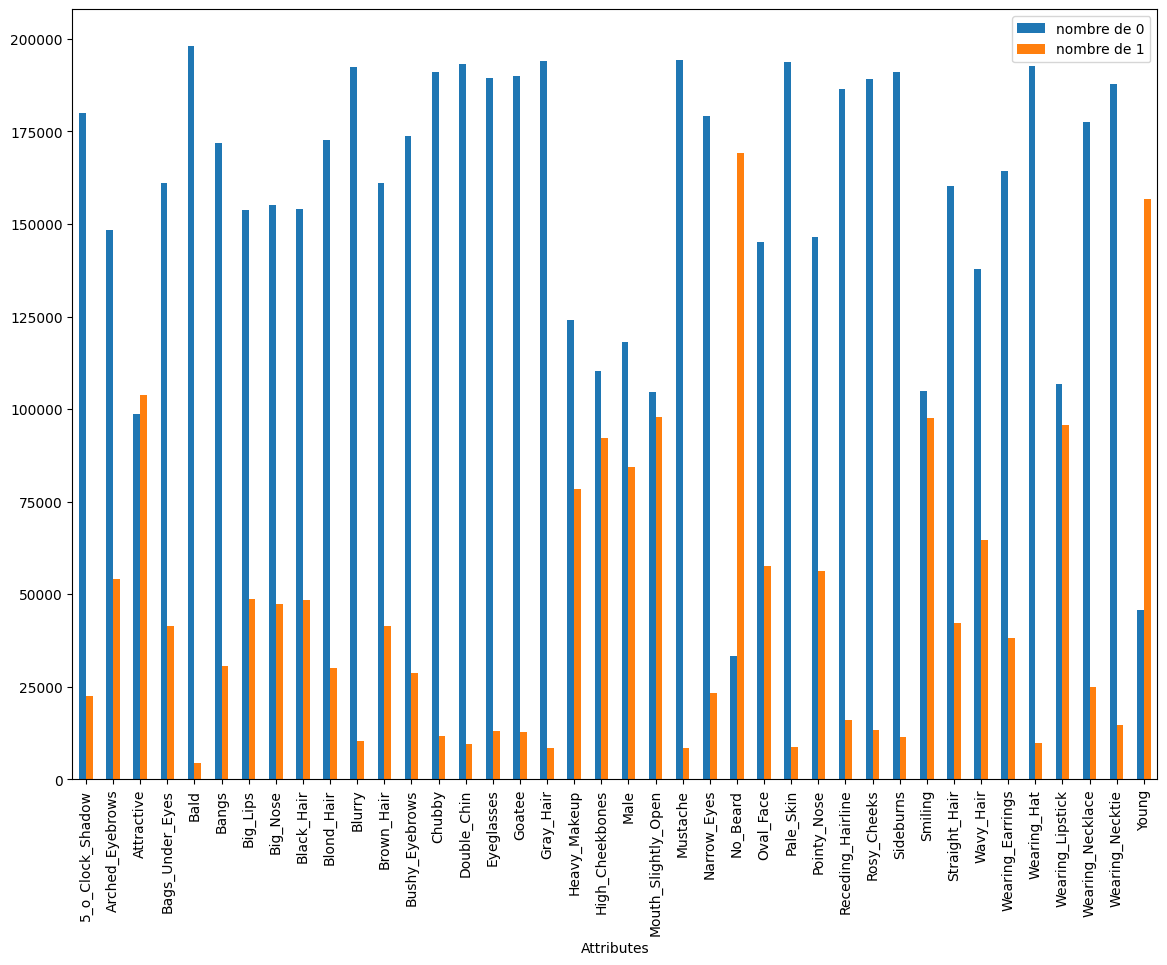

In [9]:
categorical_1 = np.array(dataset_desc.keys()[1:])
numerical = []
tot = len(dataset_desc[dataset_desc.keys()[1]])

for i in categorical_1:
    d = dataset_desc[i].sum(axis = 0)
    val = [i,int(tot - d), int(d)]
    numerical.append(val)

data = numerical
print(np.array(data).shape)
df=pd.DataFrame(data,columns=["Attributes","nombre de 0", "nombre de 1"])
df.plot(x="Attributes", y=["nombre de 0", "nombre de 1"], kind="bar",figsize=(14,10))
plt.savefig('Attributes Counts')
plt.show()

## Train

Ci-joint un aperçu de l'entrainement du modéle. 

In [10]:
T = Train(lr = 0.1, attributs=["Smiling"], epochs=1, nbr_itr_epoch=5)
T.training(batch_size = 16)

epoch : 0 ------ iteration : 0  ------   model_loss : 0.35334572196006775 ---------- loss_dis : 0.2500743269920349 ------- loss_ae : 0.35334572196006775
epoch : 0 ------ iteration : 1  ------   model_loss : 0.31584373116493225 ---------- loss_dis : 0.25118905305862427 ------- loss_ae : 0.31583863496780396
epoch : 0 ------ iteration : 2  ------   model_loss : 0.35066932439804077 ---------- loss_dis : 0.24906621873378754 ------- loss_ae : 0.3506588637828827
epoch : 0 ------ iteration : 3  ------   model_loss : 0.3775379955768585 ---------- loss_dis : 0.2688513994216919 ------- loss_ae : 0.3775228261947632
epoch : 0 ------ iteration : 4  ------   model_loss : 0.362838476896286 ---------- loss_dis : 0.24940043687820435 ------- loss_ae : 0.36281833052635193


A noter : Pour entrainer le modèle, lancer directement train_shell.bat.

#### Un apeçu de l'evolution des images pendant l'entrainement

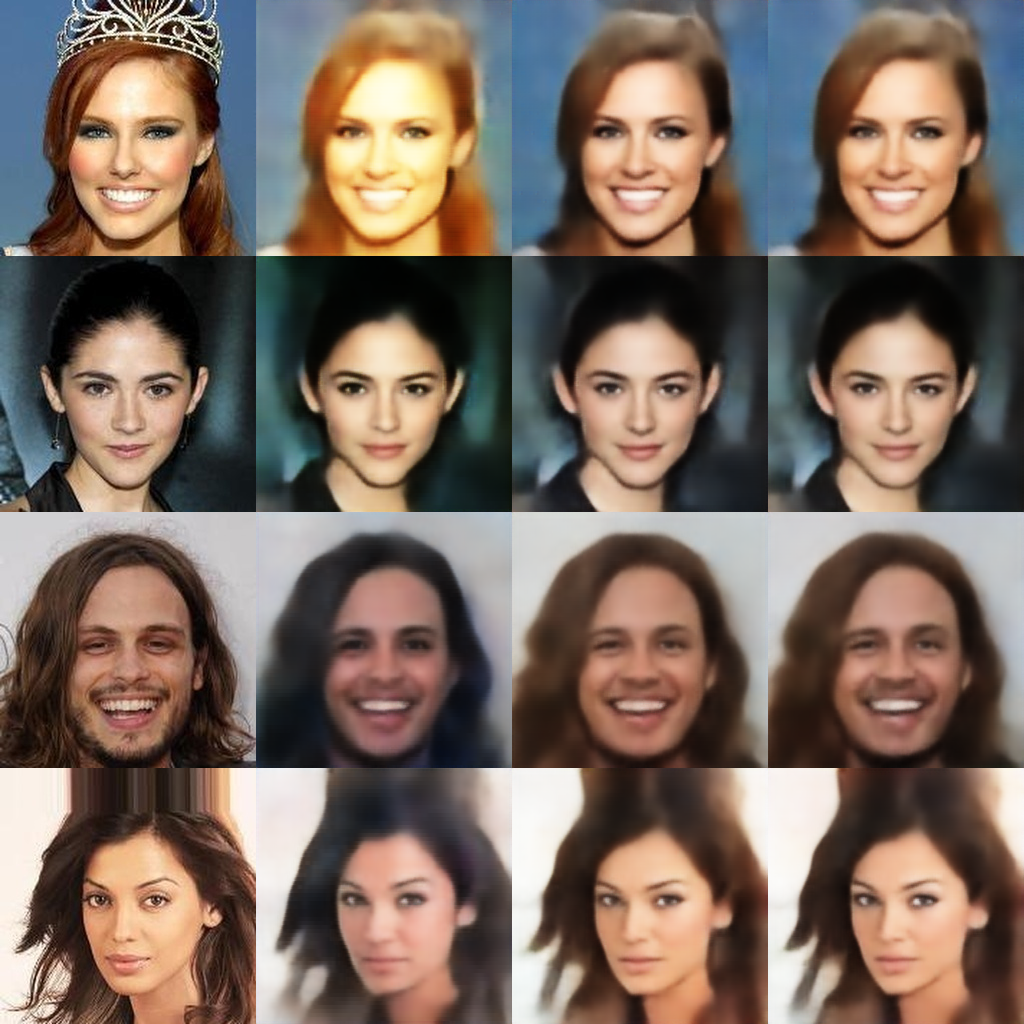

In [2]:
imageLue = Image.open('./utils/result_train/train_Male_13-12-2022.png')
imageLue

### Fonction loss après un petit nombre d'epochs

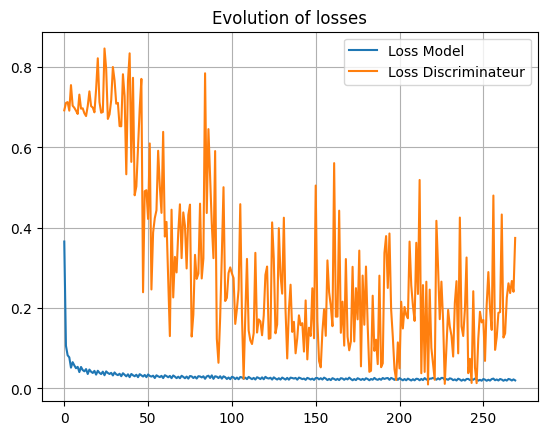

In [3]:
imageLue = Image.open('./utils/loss/losses_Male.png')
imageLue

Ces losses représentes un entrainement de 54 epochs.

### Lancement du test sur le modéle entrainer pour l'attribut 'Male'

Pour pouvoir lancer le test, il faut avoir les images pré traitée et placée dans le bon chemin

In [4]:
E = Evaluation(attributs=["Male"], batch_test=16, weights=".\\utils\\models\\")
imgs, x_reconstruct = E.test()
E.plot_testImg()

IndexError: list index out of range

### Exemple d'une image avec l'attribut Male modifier

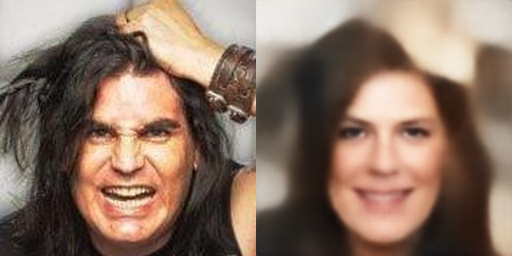

In [5]:
imageLue2 = Image.open('./utils/result_test/Switch_to_Women.png')
imageLue2

On peut voir que l'image tend à etre modifiée sur l'attribut "Male" de homme vers femme, néanmoins la reconstruction n'est pas assez bonne ce qui est probablement dù au faible nombre d'epochs d'entrainement éffectué.

L'entrainement est fait sur 100 epochs ce qui correspond à 10% de ce qui est mentionné dans l'article, ce qui peut expliquer nos résultats.